In [1]:
from datasets import load_from_disk

ds = load_from_disk("data/transient-attributes-dataset")
ds

DatasetDict({
    train: Dataset({
        features: ['path', 'label'],
        num_rows: 2201
    })
    test: Dataset({
        features: ['path', 'label'],
        num_rows: 551
    })
})

In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['path', 'label'],
        num_rows: 2201
    })
    test: Dataset({
        features: ['path', 'label'],
        num_rows: 551
    })
})

In [3]:
labels = ['cloudy', 'night', 'rain', 'snow', 'sunny']
stoi = {s: i for i, s in enumerate(labels)}
itos = {i: s for i, s in enumerate(labels)}

labels, stoi, itos

(['cloudy', 'night', 'rain', 'snow', 'sunny'],
 {'cloudy': 0, 'night': 1, 'rain': 2, 'snow': 3, 'sunny': 4},
 {0: 'cloudy', 1: 'night', 2: 'rain', 3: 'snow', 4: 'sunny'})

In [14]:
import shutil

for item in ds["train"]:
    # print(item)
    label = itos[item["label"]]
    # print(item["path"].split("/")[-1])
    # print(label)
    fname = item["path"].split("/")[-1]
    dest = f"transient-attr-images/train/{label}/{fname}"
    shutil.copy(item["path"], dest)
    # break


In [15]:
import shutil

for item in ds["test"]:
    # print(item)
    label = itos[item["label"]]
    # print(item["path"].split("/")[-1])
    # print(label)
    fname = item["path"].split("/")[-1]
    dest = f"transient-attr-images/test/{label}/{fname}"
    shutil.copy(item["path"], dest)
    # break

In [19]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

DATASET_PATH = "transient-attr-images/train"
tf = transforms.Compose(  # resize to 512 x 512, convert to tensor, normalize
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

dataset = ImageFolder(
    root=DATASET_PATH,
    transform=tf,
)

In [20]:
dataset

Dataset ImageFolder
    Number of datapoints: 2080
    Root location: transient-attr-images/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [21]:
dataset[0]

(tensor([[[ 0.1686,  0.2392,  0.2549,  ...,  0.1765,  0.3020,  0.1294],
          [ 0.1608,  0.1451,  0.1608,  ...,  0.1373,  0.1294,  0.0902],
          [ 0.2235,  0.2235,  0.2314,  ...,  0.2078,  0.1922,  0.1765],
          ...,
          [-0.0431, -0.0275, -0.0118,  ..., -0.4588, -0.4588, -0.4745],
          [-0.1059, -0.0353, -0.0275,  ..., -0.4667, -0.4667, -0.4667],
          [-0.2078, -0.0588, -0.0353,  ..., -0.4588, -0.4588, -0.4667]],
 
         [[ 0.1922,  0.2706,  0.2941,  ...,  0.1765,  0.3098,  0.1373],
          [ 0.2000,  0.1843,  0.1922,  ...,  0.1373,  0.1373,  0.0902],
          [ 0.2784,  0.2784,  0.2863,  ...,  0.1922,  0.1843,  0.1843],
          ...,
          [ 0.0431,  0.0588,  0.0745,  ..., -0.4510, -0.4588, -0.4667],
          [-0.0510,  0.0431,  0.0667,  ..., -0.4667, -0.4588, -0.4667],
          [-0.1686,  0.0196,  0.0510,  ..., -0.4510, -0.4588, -0.4667]],
 
         [[ 0.1686,  0.2392,  0.2627,  ...,  0.1216,  0.2706,  0.0902],
          [ 0.1608,  0.1451,

In [22]:
import matplotlib.pyplot as plt

In [23]:
_item, _label = dataset[0]

In [24]:
_item.shape

torch.Size([3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


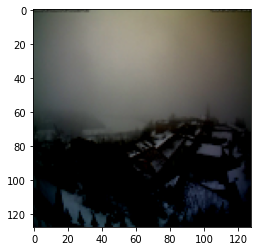

In [25]:
plt.imshow(  _item.permute(1, 2, 0)  )